# Metropolis Algorithm


1. Sample $$x^{*} \sim q\left(x^{*} | x^{(s)}\right)$$
2. Compute the acceptance ratio
$$ 
r=\frac{p_{0}\left(x^{*}\right)}{p_{0}\left(x^{(s)}\right)} 
 $$
3. Sample $u \sim \mathcal{U}(0,1)$
$$ 
x^{(s+1)}=\left\{\begin{array}{ll}{x^{*}}, \text { if } u < r \\ {x^{(s)}, \text { if } u \geqslant r}\end{array}\right.
$$


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def p_0(x, mu = 0, sig = 1):
    posterior = (1/(math.sqrt(2*math.pi*sig**2)))*(math.e**(-((x - mu)**2)/(2*sig**2)))
    return posterior


def metropolis(N = 100000):
    
    samples = []
    rates = []
    means = []
    rate = 0
    
    x = np.random.normal()
    p = p_0(x)
    
    for i in range(1, N+1):
        x_star = x + np.random.normal()
        p_star = p_0(x_star)
        r = p_star / p
        u = np.random.uniform()
        if u < r:
            x = x_star
            p = p_star
            rate += 1
        samples.append(x)
        rates.append(100*rate/i)
        means.append(np.mean(np.array(samples)))
    return (np.array(samples), np.array(rates), np.array(means))

def plot_samples(samples, iter1 = 100, iter2 = 1000, iter3 = 10000, iter4 = 100000):
    x_array = np.linspace(-4.0, 4.0, 100)
    y_array = np.asarray( [p_0(x) for x in x_array] )
    
    fig = plt.figure(figsize = (12, 9))
    
    ax1 = fig.add_subplot(221)
    ax1.set_xlabel("Sample")
    ax1.set_ylabel("Frequency")
    ax1.plot(x_array,y_array, color = "red")
    ax1.hist(samples[:iter1], bins=70,normed=1, color = "tab:blue")
    ax1.set_title('Metropolis: Number of Iterations='+str(iter1))
    plt.grid()
    
    ax2 = fig.add_subplot(222)
    ax2.set_xlabel("Sample")
    ax2.set_ylabel("Frequency")
    ax2.plot(x_array,y_array, color = "red")
    ax2.hist(samples[:iter2], bins=70,normed=1, color = "tab:blue")
    ax2.set_title('Metropolis: Number of Iterations='+str(iter2))
    plt.grid()
    
    ax3 = fig.add_subplot(223)
    ax3.set_xlabel("Sample")
    ax3.set_ylabel("Frequency")
    ax3.plot(x_array,y_array, color = "red")
    ax3.hist(samples[:iter3], bins=70,normed=1, color = "tab:blue")
    ax3.set_title('Metropolis: Number of Iterations='+str(iter3))
    plt.grid()
    
    ax4 = fig.add_subplot(224)
    ax4.set_xlabel("Sample")
    ax4.set_ylabel("Frequency")
    ax4.plot(x_array,y_array, color = "red")
    ax4.hist(samples[:iter4], bins=70,normed=1, color = "tab:blue")
    ax4.set_title('Metropolis: Number of Iterations='+str(iter4))
    plt.grid()
    
    plt.show()


def plot_trace(samples, iter1 = 100, iter2 = 1000, iter3 = 10000, iter4 = 100000):
    fig = plt.figure(figsize = (12, 9))
    
    ax1 = fig.add_subplot(221)
    ax1.plot(samples[:iter1])
    ax1.set_title('Metropolis: Number of Iterations='+str(iter1))
    ax1.set_xlabel("Number of Iterations")
    ax1.set_ylabel("Sample")    
 
    ax2 = fig.add_subplot(222)
    ax2.plot(samples[:iter2])
    ax2.set_title('Metropolis: Number of Iterations='+str(iter2))
    ax2.set_xlabel("Number of Iterations")
    ax2.set_ylabel("Sample") 
    
    ax3 = fig.add_subplot(223)
    ax3.plot(samples[:iter3])
    ax3.set_title('Metropolis: Number of Iterations='+str(iter3))
    ax3.set_xlabel("Number of Iterations")
    ax3.set_ylabel("Sample") 
    
    ax4 = fig.add_subplot(224)
    ax4.plot(samples[:iter4])
    ax4.set_title('Metropolis: Number of Iterations='+str(iter4))
    ax4.set_xlabel("Number of Iterations")
    ax4.set_ylabel("Sample") 
    
    plt.show()
    
    
def plot_rates(rates, iter1 = 100, iter2 = 1000, iter3 = 10000, iter4 = 100000):
    fig = plt.figure(figsize = (12, 9))
    
    ax1 = fig.add_subplot(221)
    ax1.plot(rates[:iter1])
    ax1.set_title('Metropolis: Number of Iterations='+str(iter1))
    ax1.set_xlabel("Number of Iterations")
    ax1.set_ylabel("Acceptance Rate")
    rate = rates[iter1-1]
    ax1.text(0.2, 0.95, str(round(rate,2))+"%",transform=ax1.transAxes,horizontalalignment='right',fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax2 = fig.add_subplot(222)
    ax2.plot(rates[:iter2])
    ax2.set_title('Metropolis: Number of Iterations='+str(iter2))
    ax2.set_xlabel("Number of Iterations")
    ax2.set_ylabel("Acceptance Rate")
    rate = rates[iter2-1]
    ax2.text(0.2, 0.95, str(round(rate,2))+"%",transform=ax2.transAxes,horizontalalignment='right',fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax3 = fig.add_subplot(223)
    ax3.plot(rates[:iter3])
    ax3.set_title('Metropolis: Number of Iterations='+str(iter3))
    ax3.set_xlabel("Number of Iterations")
    ax3.set_ylabel("Acceptance Rate")
    rate = rates[iter3-1]
    ax3.text(0.2, 0.95, str(round(rate,2))+"%",transform=ax3.transAxes,horizontalalignment='right',fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax4 = fig.add_subplot(224)
    ax4.plot(rates[:iter4])
    ax4.set_title('Metropolis: Number of Iterations='+str(iter4))
    ax4.set_xlabel("Number of Iterations")
    ax4.set_ylabel("Acceptance Rate")
    rate = rates[iter4-1]
    ax4.text(0.2, 0.95, str(round(rate,2))+"%",transform=ax4.transAxes,horizontalalignment='right',fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.show()
    
def plot_means(means, iter1 = 100, iter2 = 1000, iter3 = 10000, iter4 = 100000):
    fig = plt.figure(figsize = (12, 9))
    
    ax1 = fig.add_subplot(221)
    ax1.plot(means[:iter1])
    ax1.set_title('Metropolis: Number of Iterations='+str(iter1))
    ax1.set_xlabel("Number of Iterations")
    ax1.set_ylabel("Mean")
    mean = means[iter1-1]
    ax1.text(0.15, 0.95, str(round(mean,2)),transform=ax1.transAxes,horizontalalignment='right', fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax2 = fig.add_subplot(222)
    ax2.plot(means[:iter2])
    ax2.set_title('Metropolis: Number of Iterations='+str(iter2))
    ax2.set_xlabel("Number of Iterations")
    ax2.set_ylabel("Mean")
    mean = means[iter2-1]
    ax2.text(0.15, 0.95, str(round(mean,2)),transform=ax2.transAxes,horizontalalignment='right', fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax3 = fig.add_subplot(223)
    ax3.plot(means[:iter3])
    ax3.set_title('Metropolis: Number of Iterations='+str(iter3))
    ax3.set_xlabel("Number of Iterations")
    ax3.set_ylabel("Mean")
    mean = means[iter3-1]
    ax3.text(0.15, 0.95, str(round(mean,2)),transform=ax3.transAxes,horizontalalignment='right', fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    ax4 = fig.add_subplot(224)
    ax4.plot(means[:iter4])
    ax4.set_title('Metropolis: Number of Iterations='+str(iter4))
    ax4.set_xlabel("Number of Iterations")
    ax4.set_ylabel("Mean")
    mean = means[iter4-1]
    ax4.text(0.15, 0.95, str(round(mean,2)),transform=ax4.transAxes,horizontalalignment='right', fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.show()    
    
    
def plot(samples, rates, means):
    x_array = np.linspace(-4.0, 4.0, 100)
    y_array = np.asarray( [p_0(x) for x in x_array] )
    
    fig = plt.figure(figsize = (12, 9))
    
    ax1 = fig.add_subplot(221)
    ax1.set_xlabel("Sample")
    ax1.set_ylabel("Frequency")
    ax1.plot(x_array,y_array, color = "red")
    ax1.hist(samples, bins=70,normed=1, color = "tab:blue")
    ax1.set_title('Metropolis: Number of Iterations='+str(len(samples)))
    plt.grid()
    
    ax2 = fig.add_subplot(222)
    ax2.plot(samples)
    ax2.set_title('Metropolis: Number of Iterations='+str(len(samples)))
    ax2.set_xlabel("Number of Iterations")
    ax2.set_ylabel("Sample")    

    ax3 = fig.add_subplot(223)
    ax3.plot(rates)
    ax3.set_title('Metropolis: Number of Iterations='+str(len(rates)))
    ax3.set_xlabel("Number of Iterations")
    ax3.set_ylabel("Acceptance Rate")
    rate = rates[len(samples) - 1]
    ax3.text(0.2, 0.95, str(round(rate,2))+"%",transform=ax3.transAxes,horizontalalignment='right',fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    
    ax4 = fig.add_subplot(224)
    ax4.plot(means)
    ax4.set_title('Metropolis: Number of Iterations='+str(len(means)))
    ax4.set_xlabel("Number of Iterations")
    ax4.set_ylabel("Mean")
    mean = means[len(samples) - 1]
    ax4.text(0.15, 0.95, str(round(mean,2)),transform=ax4.transAxes,horizontalalignment='right', fontsize=14,  verticalalignment='top',
         bbox = dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.show()

***

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


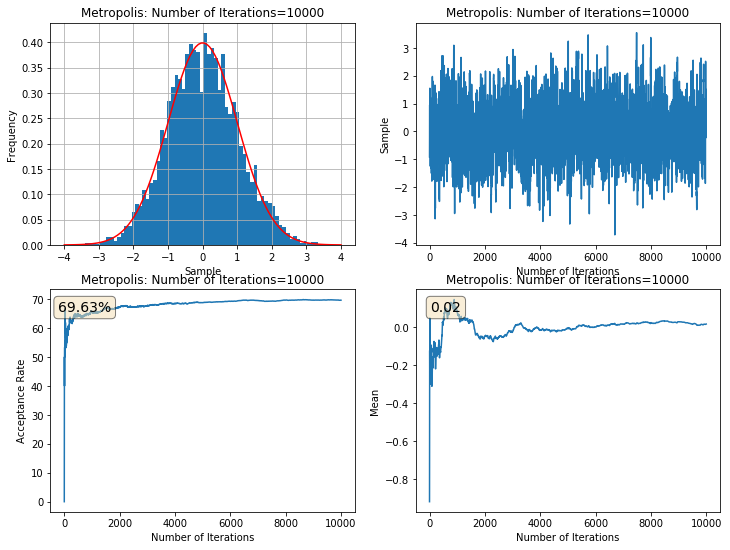

In [2]:
iterations = 10000
samples, rates, means = metropolis(iterations)
plot(samples, rates, means)

_____________________________________________________________________________________________________________________________

## *Comparison: Metropolis algorithm's behavior over 100, 1000, 10000 and 100000 iterations*

In [3]:
iterations = 100000
samples, rates, means = metropolis(iterations)

###  Histogram of samples

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


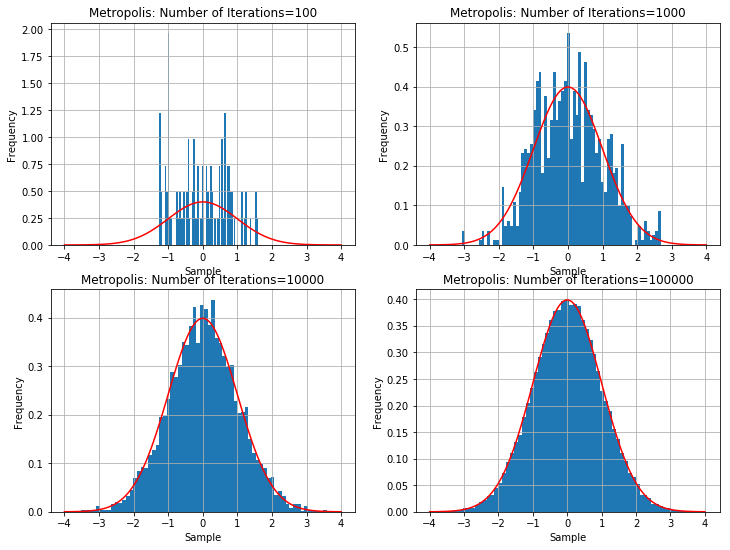

In [4]:
plot_samples (samples)

### Trace Plot

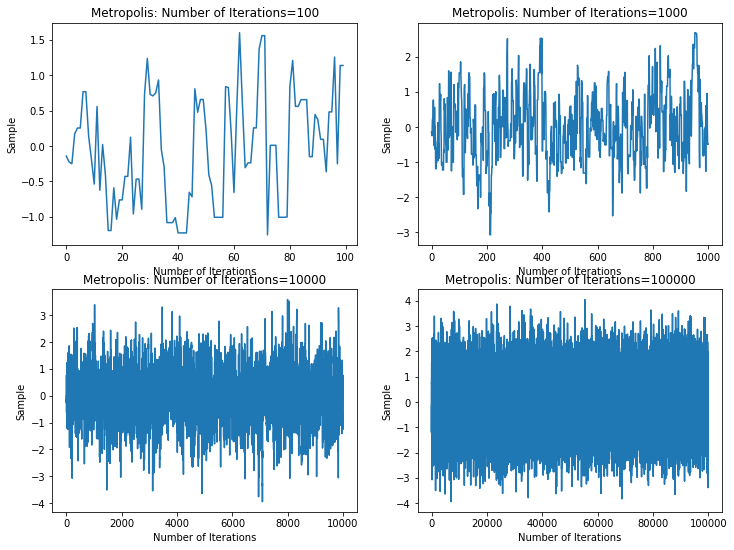

In [5]:
plot_trace (samples)

### Trace of Acceptance Rate

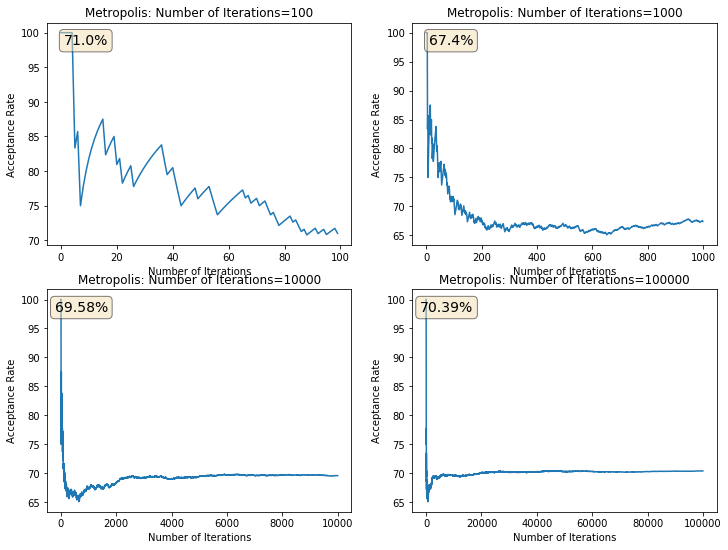

In [6]:
plot_rates (rates)

### Trace of Mean

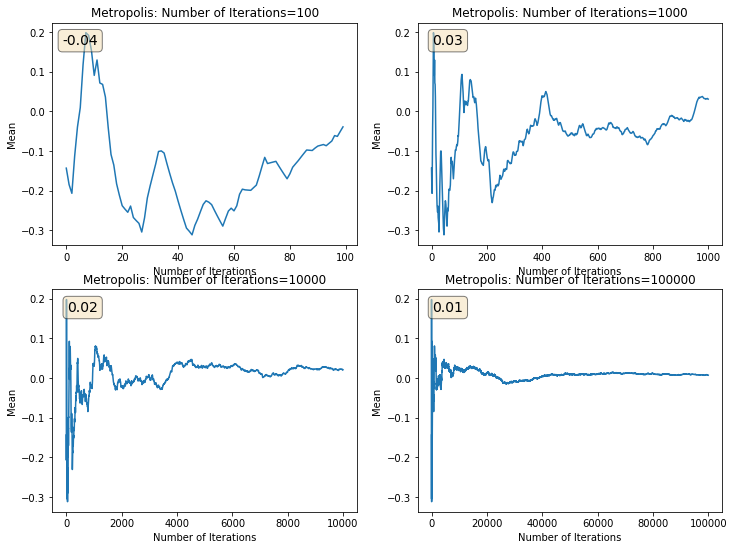

In [7]:
plot_means (means)